In [99]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [100]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usEducation = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

usEducation.columns = usEducation.columns.str.lower()

In [101]:
usEducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
primary_key                     1492 non-null object
state                           1492 non-null object
year                            1492 non-null int64
enroll                          1229 non-null float64
total_revenue                   1280 non-null float64
federal_revenue                 1280 non-null float64
state_revenue                   1280 non-null float64
local_revenue                   1280 non-null float64
total_expenditure               1280 non-null float64
instruction_expenditure         1280 non-null float64
support_services_expenditure    1280 non-null float64
other_expenditure               1229 non-null float64
capital_outlay_expenditure      1280 non-null float64
grades_pk_g                     1319 non-null float64
grades_kg_g                     1360 non-null float64
grades_4_g                      1361 non-null float64
grades_8_g                      1

In [102]:
fill_list = ["enroll", "total_revenue", "federal_revenue", 
             "state_revenue", "federal_revenue", "total_expenditure", 
             "instruction_expenditure", "support_services_expenditure",
             "other_expenditure", "capital_outlay_expenditure", "grades_pk_g", 
             "grades_kg_g", "grades_4_g", "grades_8_g", "grades_12_g", "grades_all_g", 
             "avg_math_4_score", "avg_math_8_score",'avg_reading_4_score','avg_reading_4_score','avg_reading_8_score']
for col in fill_list:
    usEducation.loc[:, col] = usEducation.loc[:, col].fillna(usEducation.loc[:, col].mean())

In [103]:
usEducation.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


In [104]:
usEducation.isnull().sum()/usEducation.isnull().count()

primary_key                     0.000000
state                           0.000000
year                            0.000000
enroll                          0.000000
total_revenue                   0.000000
federal_revenue                 0.000000
state_revenue                   0.000000
local_revenue                   0.142091
total_expenditure               0.000000
instruction_expenditure         0.000000
support_services_expenditure    0.000000
other_expenditure               0.000000
capital_outlay_expenditure      0.000000
grades_pk_g                     0.000000
grades_kg_g                     0.000000
grades_4_g                      0.000000
grades_8_g                      0.000000
grades_12_g                     0.000000
grades_1_8_g                    0.087802
grades_9_12_g                   0.087802
grades_all_g                    0.000000
avg_math_4_score                0.000000
avg_math_8_score                0.000000
avg_reading_4_score             0.000000
avg_reading_8_sc

# 1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

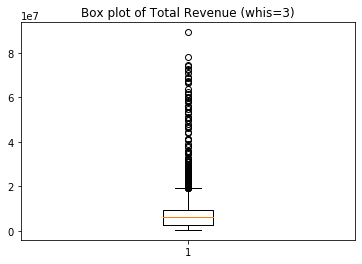

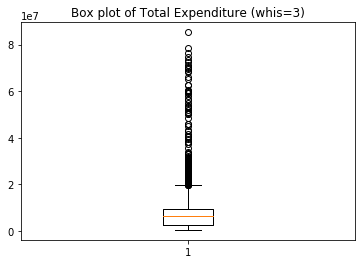

In [105]:
plt.boxplot(usEducation["total_revenue"])
plt.title("Box plot of Total Revenue (whis=3)")
plt.show()

plt.boxplot(usEducation["total_expenditure"])
plt.title("Box plot of Total Expenditure (whis=3)")
plt.show()




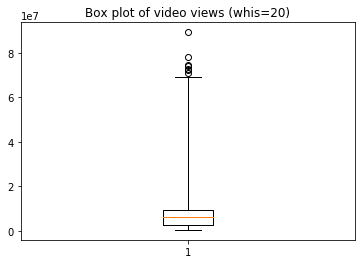

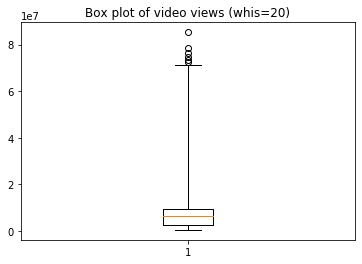

In [106]:

plt.boxplot(usEducation["total_revenue"], whis=9)
plt.title("Box plot of video views (whis=20)")
plt.show()

plt.boxplot(usEducation["total_expenditure"], whis=9)
plt.title("Box plot of video views (whis=20)")
plt.show()

The boxplots above for Total Revenue and Total Expenditure has outliers.

In [107]:
# z score to total revenue
from scipy.stats import zscore
z_scores = zscore(usEducation["total_revenue"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
    
    
    ## zscore for total expenditure
z_scores = zscore(usEducation["total_expenditure"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285]),)
Number of outliers is:

The zscores also shows outliers for both Total Revenue and Total Expenditure.

# 2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [115]:
from scipy.stats.mstats import winsorize

winsorizeRevenue = winsorize(usEducation["total_revenue"],(0, 0.10))
winsorizeExpenditure = winsorize(usEducation["total_expenditure"],(0, 0.10))

winsorizeRevenue, winsorizeExpenditure

(masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                    ..., 9092081.85859375, 9092081.85859375,
                    9092081.85859375],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[2653798.     ,  972488.     , 3401580.     , ...,
                    9196680.86875, 9196680.86875, 9196680.86875],
              mask=False,
        fill_value=1e+20))

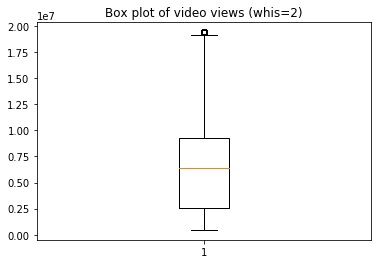

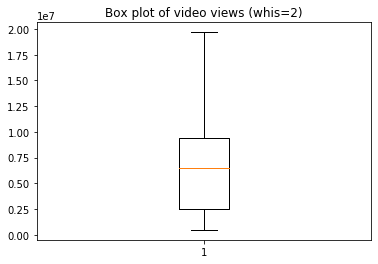

In [179]:
plt.boxplot(winsorizeRevenue)
plt.title("Box plot of video views (whis=2)")
plt.show()


plt.boxplot(winsorizeExpenditure)
plt.title("Box plot of video views (whis=2)")
plt.show()


# 3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [180]:
budgetDeficit = usEducation.total_revenue - usEducation.total_expenditure

Text(0.5, 1.0, 'Box plot of budget deficit')

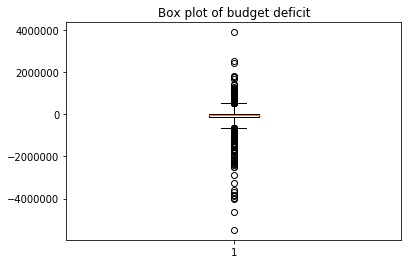

In [181]:
plt.boxplot(budgetDeficit, whis = 3)
plt.title("Box plot of budget deficit")

In [182]:
from scipy.stats.mstats import winsorize

winsorizeBudgetDeficit = winsorize(usEducation["total_revenue"],(0, 0.10))

winsorizeBudgetDeficit


masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

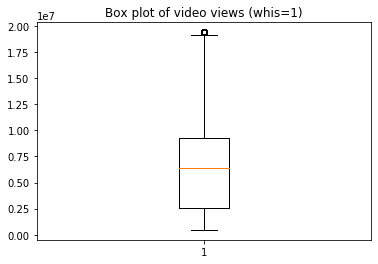

In [183]:
plt.boxplot(winsorizeBudgetDeficit)
plt.title("Box plot of video views (whis=1)")
plt.show()

After eliminating just a few outliers left.

# 4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [184]:
budgetDeficit2 = winsorizeRevenue - winsorizeExpenditure


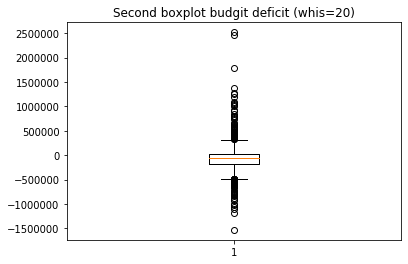

In [185]:
plt.boxplot(budgetDeficit2)
plt.title("Second boxplot budgit deficit (whis=20)")
plt.show()


In [186]:
budgetDeficit2 = winsorize(budgetDeficit2, (0, 0.07))

budgetDeficit2


masked_array(data=[  25087.        ,   77103.        , -143501.        ,
                   ..., -104599.01015625, -104599.01015625,
                   -104599.01015625],
             mask=False,
       fill_value=1e+20)

Text(0.5, 1.0, 'Box plot of second Budget Deficit')

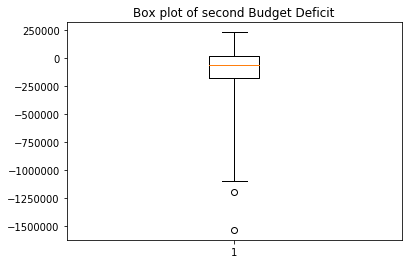

In [187]:

plt.boxplot(budgetDeficit2, whis = 5)
plt.title("Box plot of second Budget Deficit")

After eliminating only a few outliers left.


# 5) Compare some basic statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [177]:
 pd.DataFrame({"original budget": budgetDeficit, "winsorized budget": winsorizeBudgetDeficit,
              "winsorized budget2": budgetDeficit2}).describe()

,original budget,winsorized budget,winsorized budget2
count,1.492000e+03,1.492000e+03,1.492000e+03
mean,-1.045990e+05,7.518248e+06,-9.222623e+04
std,5.310770e+05,5.723655e+06,1.932216e+05
min,-5.487742e+06,4.656500e+05,-1.531644e+06
25%,-1.360070e+05,2.546261e+06,-1.811838e+05
50%,-4.849350e+04,6.359310e+06,-6.565100e+04
75%,2.965425e+04,9.276958e+06,2.047350e+04
max,3.897129e+06,1.937403e+07,1.655100e+05


For almost all critical statistics, the two variables differ substantially. For example:

The mean of the winsorized budget is 7.518248.33 whereas the mean of the winsorized budget2 is -9.222623.

The median of the winsorized budget  is 6.359310 whereas the median of the winsorized budget2 is -6.565100

The maximum of the winsorized budget is 1.937403 whereas the maximum of the winsorized budget2 is 1.655100.




# 6) If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?


I hypothesis creating another variable like the winsorizeDeficit2 would elimate more outliers.The outputs for the 4th question are similar to the original budget. Therefore we should consider using the 4th question. I believe the method in the third question is an outlier. It's very different from the original budget, and winsorized budget2.